# 概述

## 其他概念

1. 分类就是**将实例数据划分到合适的分类中**,例如:将病人的检查结果分为有病和健康，是一个医学方面的**二分类问题**;在电子邮箱中，收到邮件之，电子邮箱会将我们的邮件分为广告邮件，垃圾邮件和正常邮件，这就是一个**多分类的问题**
2. 通常我们会**管我们处理的数据**叫做数据集（data set）一个数据集通常来说包括三个部分，**1,训练数据（training data）及其标签，2,验证数据（validation data）及其标签，3,测试数据（testing data）** 。需要特别强调的是，这三部分都是各自独立的，也就是说训练数据中的数据不能再出现在验证数据以及测试数据中，验证数据最好也不要出现在测试数据中。
3. 训练完成后我们会用来**测试自己成果的数据**叫做测试集。
4. 距离度量公式:

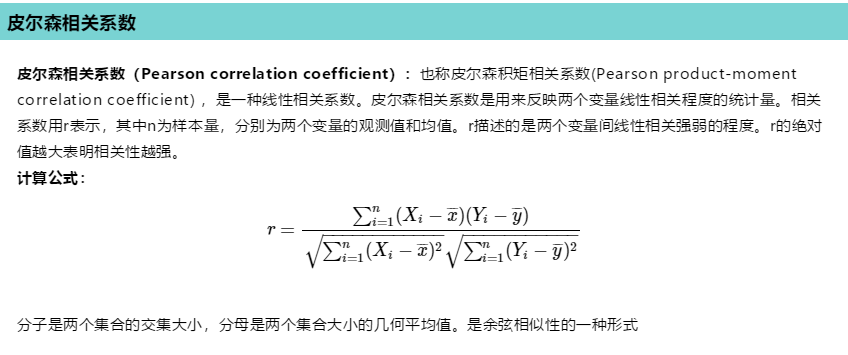
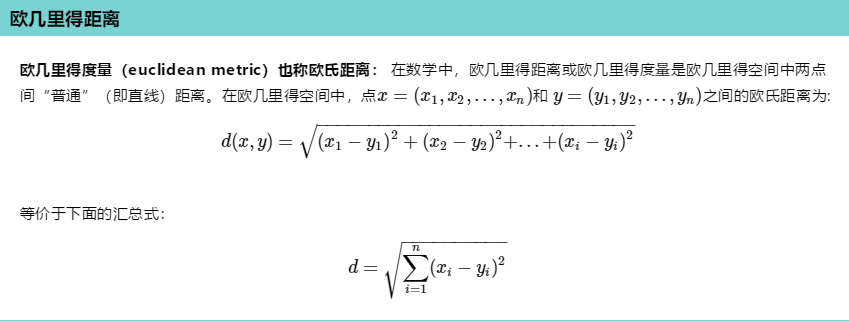
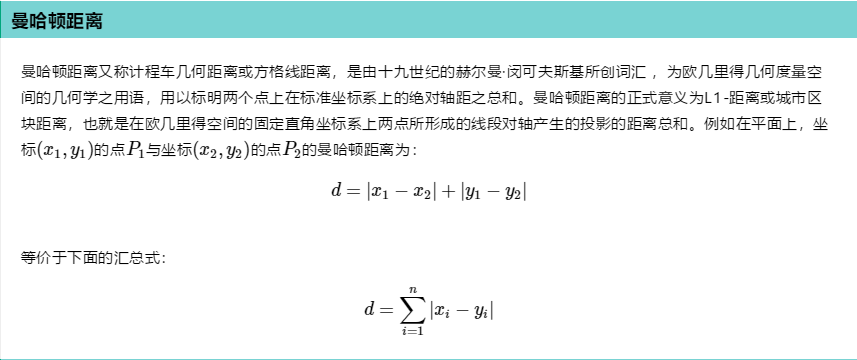
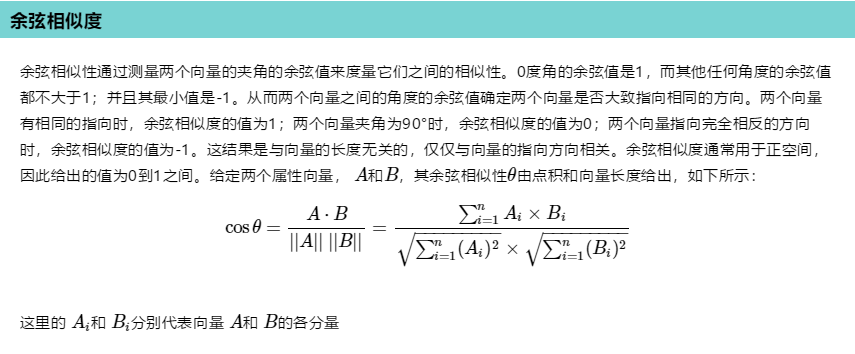
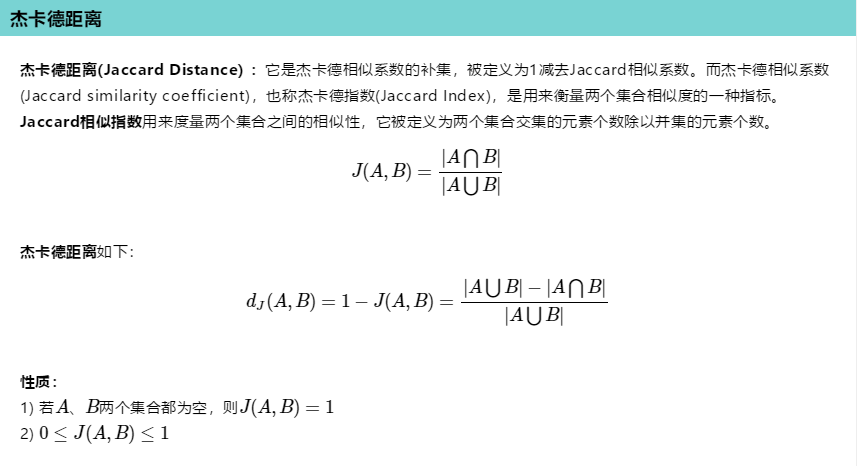
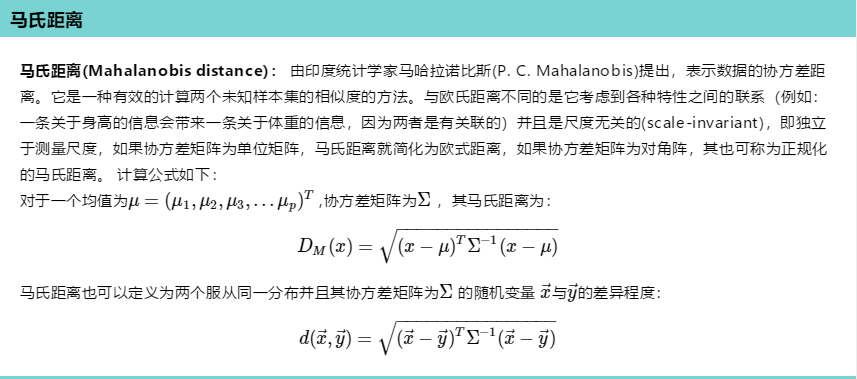
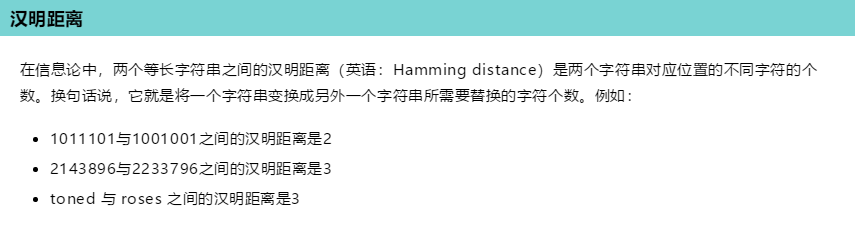

## KNN算法

KNN即K-Nearest Neighbor，采用测量不同特征值之间的距离方法进行分类，其主要思想是，如果一个样本在特征空间中的k个最近邻的样本中的大多数都属于某一类别，则该样本也属于这个类别，k通常是不大于20的整数。

**算法过程:**
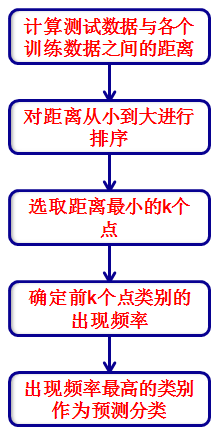

# 题目练习

## 练习一

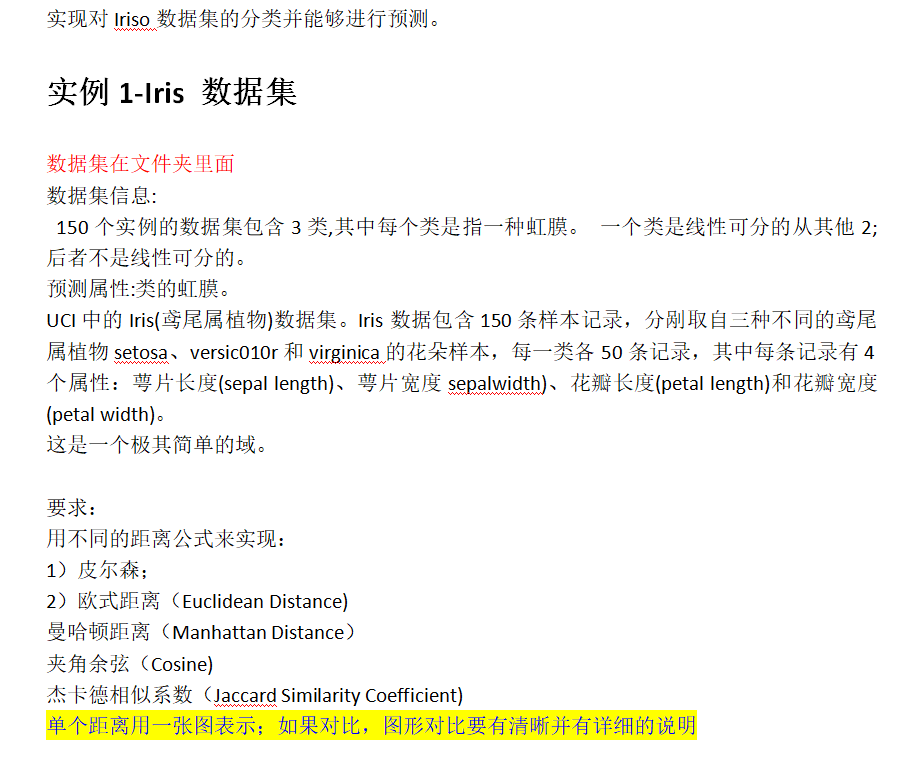

## 练习一数据分析

In [48]:
#引库
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline

plt.rcParams['font.sans-serif']='SimHei'

#数据读取
Iris_data = pd.read_csv("Iris.csv")
Iris_data.head()

,sepallength,sepalwidth,petallength,petalwidth,labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
#得到30个随机数
indexs=np.random.permutation(len(Iris_data)-1)
indexs=indexs[0:30]
#将测试集弄出来
testdata=Iris_data.take(indexs)
#总的数据集干掉测试集就是训练集
trainingdata=Iris_data.drop(indexs)
data=[testdata,trainingdata]
data

[     sepallength  sepalwidth  petallength  petalwidth           labels
 63           6.1         2.9          4.7         1.4  Iris-versicolor
 103          6.3         2.9          5.6         1.8   Iris-virginica
 132          6.4         2.8          5.6         2.2   Iris-virginica
 107          7.3         2.9          6.3         1.8   Iris-virginica
 92           5.8         2.6          4.0         1.2  Iris-versicolor
 99           5.7         2.8          4.1         1.3  Iris-versicolor
 25           5.0         3.0          1.6         0.2      Iris-setosa
 71           6.1         2.8          4.0         1.3  Iris-versicolor
 76           6.8         2.8          4.8         1.4  Iris-versicolor
 59           5.2         2.7          3.9         1.4  Iris-versicolor
 44           5.1         3.8          1.9         0.4      Iris-setosa
 116          6.5         3.0          5.5         1.8   Iris-virginica
 19           5.1         3.8          1.5         0.3      Iris

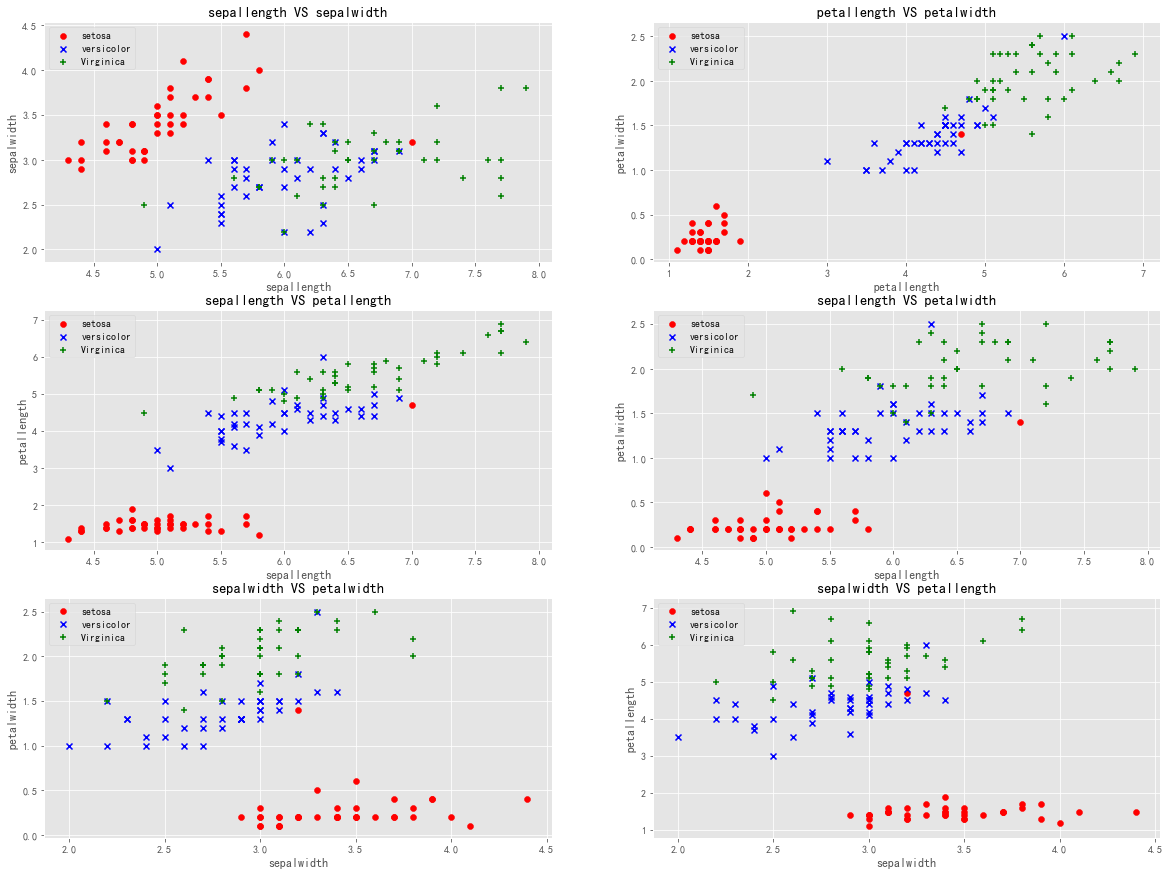

In [50]:
#数据可视化查看一下
f,ax=plt.subplots(3,2,figsize=(20,15))
plt.style.use("ggplot")
#sepallength VS sepalwidth
ax[0][0].scatter(trainingdata['sepallength'][:40], trainingdata['sepalwidth'][:40], color='red', marker='o', label='setosa') #前50个样本
ax[0][0].scatter(trainingdata['sepallength'][40:80], trainingdata['sepalwidth'][40:80], color='blue', marker='x', label='versicolor') #中间50个
ax[0][0].scatter(trainingdata['sepallength'][80:], trainingdata['sepalwidth'][80:],color='green', marker='+', label='Virginica') #后50个样本
ax[0][0].set_title('sepallength VS sepalwidth')
ax[0][0].set_xlabel('sepallength')
ax[0][0].set_ylabel('sepalwidth')
ax[0][0].legend(loc=2)

#petallength VS petalwidth
ax[0][1].scatter(trainingdata['petallength'][:40], trainingdata['petalwidth'][:40], color='red', marker='o', label='setosa') #前50个样本
ax[0][1].scatter(trainingdata['petallength'][40:80], trainingdata['petalwidth'][40:80], color='blue', marker='x', label='versicolor') #中间50个
ax[0][1].scatter(trainingdata['petallength'][80:], trainingdata['petalwidth'][80:],color='green', marker='+', label='Virginica') #后50个样本
ax[0][1].set_title('petallength VS petalwidth')
ax[0][1].set_xlabel('petallength')
ax[0][1].set_ylabel('petalwidth')
ax[0][1].legend(loc=2)

#sepallength VS petallength
ax[1][0].scatter(trainingdata['sepallength'][:40], trainingdata['petallength'][:40], color='red', marker='o', label='setosa') #前50个样本
ax[1][0].scatter(trainingdata['sepallength'][40:80], trainingdata['petallength'][40:80], color='blue', marker='x', label='versicolor') #中间50个
ax[1][0].scatter(trainingdata['sepallength'][80:], trainingdata['petallength'][80:],color='green', marker='+', label='Virginica') #后50个样本
ax[1][0].set_title('sepallength VS petallength')
ax[1][0].set_xlabel('sepallength')
ax[1][0].set_ylabel('petallength')
ax[1][0].legend(loc=2)

#sepallength VS petalwidth
ax[1][1].scatter(trainingdata['sepallength'][:40], trainingdata['petalwidth'][:40], color='red', marker='o', label='setosa') #前50个样本
ax[1][1].scatter(trainingdata['sepallength'][40:80], trainingdata['petalwidth'][40:80], color='blue', marker='x', label='versicolor') #中间50个
ax[1][1].scatter(trainingdata['sepallength'][80:], trainingdata['petalwidth'][80:],color='green', marker='+', label='Virginica') #后50个样本
ax[1][1].set_title('sepallength VS petalwidth')
ax[1][1].set_xlabel('sepallength')
ax[1][1].set_ylabel('petalwidth')
ax[1][1].legend(loc=2)

#sepalwidth VS petalwidth
ax[2][0].scatter(trainingdata['sepalwidth'][:40], trainingdata['petalwidth'][:40], color='red', marker='o', label='setosa') #前50个样本
ax[2][0].scatter(trainingdata['sepalwidth'][40:80], trainingdata['petalwidth'][40:80], color='blue', marker='x', label='versicolor') #中间50个
ax[2][0].scatter(trainingdata['sepalwidth'][80:], trainingdata['petalwidth'][80:],color='green', marker='+', label='Virginica') #后50个样本
ax[2][0].set_title('sepalwidth VS petalwidth')
ax[2][0].set_xlabel('sepalwidth')
ax[2][0].set_ylabel('petalwidth')
ax[2][0].legend(loc=2)

#sepalwidth VS petallength
ax[2][1].scatter(trainingdata['sepalwidth'][:40], trainingdata['petallength'][:40], color='red', marker='o', label='setosa') #前50个样本
ax[2][1].scatter(trainingdata['sepalwidth'][40:80], trainingdata['petallength'][40:80], color='blue', marker='x', label='versicolor') #中间50个
ax[2][1].scatter(trainingdata['sepalwidth'][80:], trainingdata['petallength'][80:],color='green', marker='+', label='Virginica') #后50个样本
ax[2][1].set_title('sepalwidth VS petallength')
ax[2][1].set_xlabel('sepalwidth')
ax[2][1].set_ylabel('petallength')
ax[2][1].legend(loc=2)

plt.show()

## 练习二

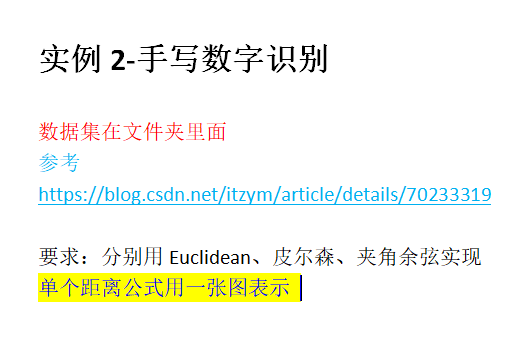